In [1]:
import pandas as pd

# ✅ 데이터 불러오기
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# ✅ 데이터 크기 확인
print("✅ train_df 크기:", train_df.shape)  # (1460, 81)로 출력되면 정상
print("✅ test_df 크기:", test_df.shape)    # (1459, 80)로 출력되면 정상

✅ train_df 크기: (1460, 81)
✅ test_df 크기: (1459, 80)


In [2]:
# ✅ 컬럼 목록 출력
print("✅ train_df 컬럼 목록:", train_df.columns)

# ✅ SalePrice 컬럼 확인
print("SalePrice in train_df:", "SalePrice" in train_df.columns)

# ✅ SalePrice 타입 확인
print("SalePrice 데이터 타입:", train_df["SalePrice"].dtype)

# ✅ SalePrice 값 샘플 출력
print(train_df["SalePrice"].head())

✅ train_df 컬럼 목록: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Garage

In [3]:
# ✅ 결측치 개수 확인
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("✅ train_df 결측치 개수:\n", missing_values)

✅ train_df 결측치 개수:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [4]:
import pandas as pd
import numpy as np

# ✅ 1. 수치형 변수 (LotFrontage) → 같은 이웃(Neighborhood) 중앙값으로 대체
train_df["LotFrontage"] = train_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test_df["LotFrontage"] = test_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# ✅ 2. 범주형 변수 → "None"으로 대체
none_cols = ["Alley", "PoolQC", "Fence", "MiscFeature", "MasVnrType",
             "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
             "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in none_cols:
    train_df[col].fillna("None", inplace=True)
    test_df[col].fillna("None", inplace=True)

# ✅ 3. 숫자형 변수 → 0으로 대체
zero_cols = ["MasVnrArea", "GarageYrBlt"]
for col in zero_cols:
    train_df[col].fillna(0, inplace=True)
    test_df[col].fillna(0, inplace=True)

# ✅ 4. Electrical → 최빈값(mode)으로 대체
train_df["Electrical"].fillna(train_df["Electrical"].mode()[0], inplace=True)
test_df["Electrical"].fillna(test_df["Electrical"].mode()[0], inplace=True)

print("✅ 결측치 처리 완료!")

✅ 결측치 처리 완료!


/tmp/ipykernel_1450770/546664652.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna("None", inplace=True)
/tmp/ipykernel_1450770/546664652.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [5]:
# ✅ 남은 결측치 개수 확인
missing_values_after = train_df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]

print("✅ 결측치 처리 후 남은 결측치 개수:\n", missing_values_after)

✅ 결측치 처리 후 남은 결측치 개수:
 Series([], dtype: int64)


In [6]:
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler

# ✅ 1. 건물 나이 (BuildingAge) 변수 추가
current_year = datetime.datetime.now().year
train_df["BuildingAge"] = current_year - train_df["YearBuilt"]
test_df["BuildingAge"] = current_year - test_df["YearBuilt"]

# ✅ 2. 전체 면적 (TotalSF) 변수 추가
train_df["TotalSF"] = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
test_df["TotalSF"] = test_df["TotalBsmtSF"] + test_df["1stFlrSF"] + test_df["2ndFlrSF"]

print("✅ Feature Engineering 완료! (데이터 무결성 유지)")

✅ Feature Engineering 완료! (데이터 무결성 유지)


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# ✅ VIF 계산을 위한 숫자형 변수 선택 (ID 및 SalePrice 제외)
features = train_df.select_dtypes(include=['number']).drop(columns=['Id', 'SalePrice'], errors="ignore")

# ✅ VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# ✅ VIF가 높은 변수를 삭제하지 않고 Scaling 적용
print("✅ VIF 높은 변수 목록:\n", vif_data.sort_values(by="VIF", ascending=False).head(10))

✅ VIF 높은 변수 목록:
          Feature           VIF
13      2ndFlrSF           inf
12      1stFlrSF           inf
10     BsmtUnfSF           inf
11   TotalBsmtSF           inf
8     BsmtFinSF1           inf
9     BsmtFinSF2           inf
37       TotalSF           inf
14  LowQualFinSF           inf
15     GrLivArea           inf
5      YearBuilt  2.276117e+06


/opt/anaconda3/envs/house/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ✅ 로그 변환 적용 (왜도가 높은 변수들)
log_transform_cols = ["YearBuilt", "BuildingAge"]
for col in log_transform_cols:
    train_df[col] = np.log1p(train_df[col])
    test_df[col] = np.log1p(test_df[col])

print("✅ 로그 변환 적용 완료! (YearBuilt, BuildingAge)")

✅ 로그 변환 적용 완료! (YearBuilt, BuildingAge)


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# ✅ VIF 다시 계산
features = train_df.select_dtypes(include=['number']).drop(columns=['Id', 'SalePrice'], errors="ignore")
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# ✅ VIF 값이 정상적으로 조정되었는지 확인
print("✅ 로그 변환 후 최종 VIF 결과:\n", vif_data.sort_values(by="VIF", ascending=False).head(10))

✅ 로그 변환 후 최종 VIF 결과:
          Feature           VIF
29        YrSold  2.303645e+06
5      YearBuilt  2.244375e+06
6   YearRemodAdd  2.450900e+04
30   BuildingAge  2.241531e+03
9      GrLivArea  1.229604e+02
31       TotalSF  9.031397e+01
16  TotRmsAbvGrd  8.265718e+01
3    OverallQual  7.201114e+01
4    OverallCond  4.588720e+01
19    GarageCars  3.992139e+01


/opt/anaconda3/envs/house/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/house/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45458 (\N{HANGUL SYLLABLE NOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/house/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/house/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/house/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) mis

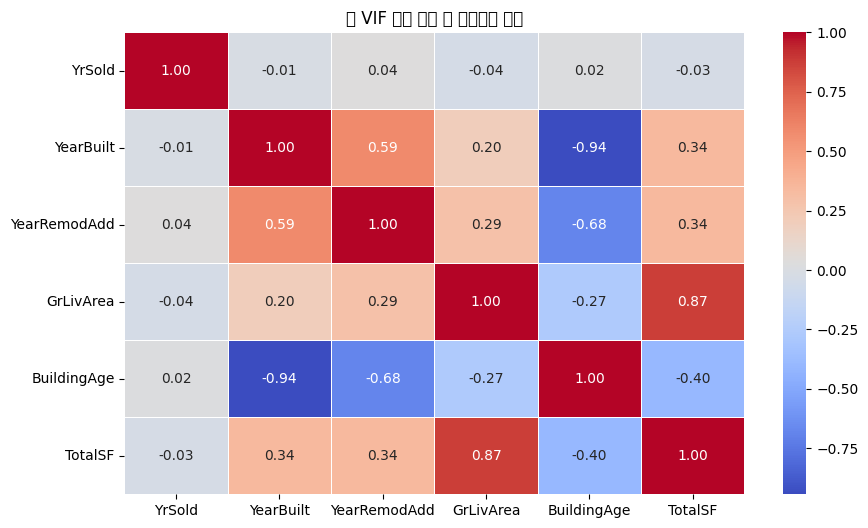

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ VIF가 높은 변수들만 추출
high_vif_cols = ["YrSold", "YearBuilt", "YearRemodAdd", "GrLivArea", "BuildingAge", "TotalSF"]

# ✅ 상관계수 확인
plt.figure(figsize=(10, 6))
sns.heatmap(train_df[high_vif_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("✅ VIF 높은 변수 간 상관관계 확인")
plt.show()

In [18]:
from sklearn.decomposition import PCA

pca_feature_cols = ["GrLivArea", "TotalSF"]

# ✅ 결측값 확인
if train_df[pca_feature_cols].isnull().sum().sum() > 0 or test_df[pca_feature_cols].isnull().sum().sum() > 0:
    print("⚠️ PCA 적용 전 NaN 값 존재 → 결측값을 0으로 대체")
    train_df[pca_feature_cols] = train_df[pca_feature_cols].fillna(0)
    test_df[pca_feature_cols] = test_df[pca_feature_cols].fillna(0)

# ✅ PCA 적용
if all(col in train_df.columns for col in pca_feature_cols):
    pca = PCA(n_components=1)
    train_df["PCA_LivingSpace"] = pca.fit_transform(train_df[pca_feature_cols])
    test_df["PCA_LivingSpace"] = pca.transform(test_df[pca_feature_cols])

# ✅ 기존 변수 삭제
train_df.drop(columns=pca_feature_cols, inplace=True, errors="ignore")
test_df.drop(columns=pca_feature_cols, inplace=True, errors="ignore")

print("✅ GrLivArea & TotalSF를 PCA_LivingSpace로 변환 (VIF 감소 기대)")

⚠️ PCA 적용 전 NaN 값 존재 → 결측값을 0으로 대체
✅ GrLivArea & TotalSF를 PCA_LivingSpace로 변환 (VIF 감소 기대)


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# ✅ VIF 값이 높은 추가 변수 제거
drop_cols = ["FullBath", "LotFrontage"]

train_df.drop(columns=drop_cols, inplace=True, errors="ignore")
test_df.drop(columns=drop_cols, inplace=True, errors="ignore")

print(f"✅ {drop_cols} 제거 완료 (VIF 감소 기대)")

# ✅ VIF 다시 계산
features = train_df.select_dtypes(include=['number']).drop(columns=['Id', 'SalePrice'], errors="ignore")
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# ✅ VIF 최종 확인
print("✅ VIF 최종 조정 후 결과:\n", vif_data.sort_values(by="VIF", ascending=False).head(10))

✅ ['FullBath', 'LotFrontage'] 제거 완료 (VIF 감소 기대)
✅ VIF 최종 조정 후 결과:
          Feature        VIF
2    OverallQual  24.142733
8   BedroomAbvGr  11.163512
10    GarageArea   9.820537
18        MoSold   6.348550
0     MSSubClass   2.990636
9     Fireplaces   2.733072
1        LotArea   2.449382
7       HalfBath   1.937427
5   BsmtFullBath   1.878320
11    WoodDeckSF   1.840331


In [24]:
# ✅ PCA 적용 대상 컬럼들의 결측치 개수 확인
pca_feature_cols = ["1stFlrSF", "2ndFlrSF", "TotalBsmtSF"]

print("✅ PCA 적용 전 결측치 확인:")
print(train_df[pca_feature_cols].isnull().sum())
print(test_df[pca_feature_cols].isnull().sum())

✅ PCA 적용 전 결측치 확인:


KeyError: "None of [Index(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], dtype='object')] are in the [columns]"

In [11]:
# ✅ PCA 적용 전, 결측치를 0으로 채우기 (건물이 없거나 데이터 누락 시 0으로 간주)
for col in pca_feature_cols:
    train_df[col].fillna(0, inplace=True)
    test_df[col].fillna(0, inplace=True)

print("✅ PCA 적용 전 모든 결측치 처리 완료!")

✅ PCA 적용 전 모든 결측치 처리 완료!


/tmp/ipykernel_1331855/2946199040.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(0, inplace=True)
/tmp/ipykernel_1331855/2946199040.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [12]:
from sklearn.decomposition import PCA

# ✅ PCA 적용 (TotalSF 관련 변수 합성)
if all(col in train_df.columns for col in pca_feature_cols):
    pca = PCA(n_components=1)
    train_df["PCA_TotalSF"] = pca.fit_transform(train_df[pca_feature_cols])
    test_df["PCA_TotalSF"] = pca.transform(test_df[pca_feature_cols])

print("✅ PCA 적용 완료: PCA_TotalSF 변수 생성!")

✅ PCA 적용 완료: PCA_TotalSF 변수 생성!


In [15]:
from sklearn.preprocessing import OneHotEncoder

# ✅ 범주형 컬럼 찾기
categorical_cols = train_df.select_dtypes(include=["object"]).columns
print("✅ 변환할 범주형 컬럼 목록:\n", categorical_cols)

# ✅ One-Hot Encoding 적용 (XGBoost에서 사용할 수 있도록 변환)
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

print("✅ One-Hot Encoding 완료! (이제 모든 컬럼이 숫자형)")

✅ 변환할 범주형 컬럼 목록:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
✅ One-Hot Encoding 완료! (이제 모든 컬럼이 숫자형)


In [16]:
# ✅ train_df와 test_df의 컬럼 개수가 다를 수 있으므로 정렬
train_df, test_df = train_df.align(test_df, join="left", axis=1)

# ✅ NaN 값이 발생한 경우 0으로 대체 (원-핫 인코딩 과정에서 발생 가능)
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

print("✅ train_df & test_df 컬럼 정렬 및 NaN 처리 완료!")

✅ train_df & test_df 컬럼 정렬 및 NaN 처리 완료!


In [17]:
from sklearn.model_selection import train_test_split

# ✅ 모델 학습을 위한 X, y 데이터 분리
X = train_df.drop(columns=['Id', 'SalePrice'])  # 입력 변수
y = train_df["SalePrice"]  # 타겟 변수

# ✅ 훈련 데이터와 검증 데이터로 분할 (80% 훈련, 20% 검증)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ 데이터 분할 완료! (X_train, X_valid 크기 확인)")
print("X_train 크기:", X_train.shape)
print("X_valid 크기:", X_valid.shape)

✅ 데이터 분할 완료! (X_train, X_valid 크기 확인)
X_train 크기: (1168, 262)
X_valid 크기: (292, 262)


In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# ✅ XGBoost 모델 정의
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)

# ✅ 모델 학습
xgb_model.fit(X_train, y_train)

# ✅ 예측 및 평가
y_pred_xgb = xgb_model.predict(X_valid)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_pred_xgb))

print(f"✅ XGBoost 모델 RMSE: {rmse_xgb:.4f}")

✅ XGBoost 모델 RMSE: 25862.9038
